# Anscombe’s quartet dataset - Package Research
## Assignment Details

The purpose of this Jupyter notebook is to conduct research into the Anscombe’s quartet dataset.

Per the assignment, there are four distinct tasks to be completed:

1. Explain the background to the dataset – who created it, when it was created, and any speculation you can find regarding how it might have been created.
2. Plot the interesting aspects of the dataset.
3. Calculate the descriptive statistics of the variables in the dataset.
4. Explain why the dataset is interesting, referring to the plots and statistics above.

## Initial Research

Anscombe’s quartet dataset is comprised of four datasets that, when analysed with basic descriptive statistics, appear to be nearly identical. [1] Each of the four datasets consists of eleven (x, y) points which yield almost the exact same values for linear regression coefficients, x and y means, x and y variance, and pearson correlation coefficients. [2]

When graphed it can be clearly seen that although the summary statistics may be comparable, the actual datasets are far from similar in structure. [3] The datasets were first published in 1973 by the statistician Francis Anscombe in his paper “Graphs in Statistical Analysis” published in The American Statistician Vol. 27. He created the datasets to demonstrate that statistical calculations may “rest on assumptions about the behaviour of the data.” He also stated the assumptions may be incorrect and that visualizing the data can be an essential component in the analysis of data. [4]

Within his paper, Francis Anscombe also discuss the effects of outliers on statistical properties. He describes a study on education in which he studied expenditures for public schools in the “fifty of the Union, together with the District of Columbia”. From his analysis, Alaska can be determined as an outlier due to its heavy contribution in the regression analysis. He concluded that by reporting the regression relation with all datapoints in combination with reporting the regression relation with the removal of outliers, an increased understanding of the outlier’s contribution can be understood. [4]

As described in the linked blog post, it's possible to produce bivariate data with a given mean, median, and correlation in any shape desired. The paper within the post describes the methodology for disturbing the points within a scatterplot and moving them towards a given shape. All while keeping the statistical summaries close to the target values [5]



## Importing the Dataset

In [2]:
# Changing to seaborn as there is an issue with pandas.
#import pandas as pd
#df=pd.read_csv('raw_data.csv',header=[0,1],index_col=[0])

import seaborn as sns

df = sns.load_dataset("anscombe")

# print dataset to ensure imported correctly

print(df)

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

## Basic Descriptive Statistics and Graphing

In [3]:
DI = df[df['dataset']=='I']
DII = df[df['dataset']=='II']
DIII = df[df['dataset']=='III']
DIV = df[df['dataset']=='IV']

In [45]:
# Describe the Data set
df.groupby("dataset").describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

The following can be noted from the datasets:
- X
    - The sizes are all the same.
    - The standard deviations and means are identical to at least 6 decimal places. 
    - For the 1st, 2nd and 3rd dataset the 25th, 50th, and 75th percentiles are identical. The 4th dataset have values that almost all stay at or close to the minimum.
- Y
    - The sizes are all the same.
    - The standard deviations and means are identical to at least 2 decimal places. 
    - The percentile values show a similair pattern but more indepth analysis is required to determine statistical differences.

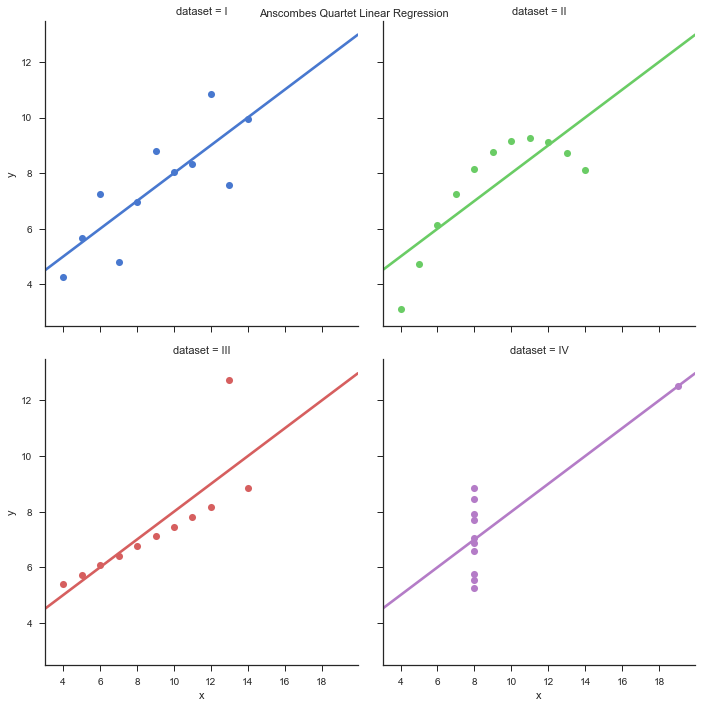

In [22]:
%matplotlib inline

sns.set(style="ticks")

# Show the results of a linear regression within each dataset - Based on Seaborn documentation
lm = sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", order=1,
           scatter_kws={"s": 50, "alpha": 1})


fig = lm.fig
fig.suptitle("Anscombes Quartet Linear Regression", fontsize =11)
plt.show()

Through graphing the data and plotting a linear regression line of best fit it can be easily noted that although the datasets contain similiar discriptive statistics and can producde identical straight lines, clear differences within the dataset can be noted. 

For the 1st dataset linear regression appears to be a good model. However, for the other three other methods may be best.

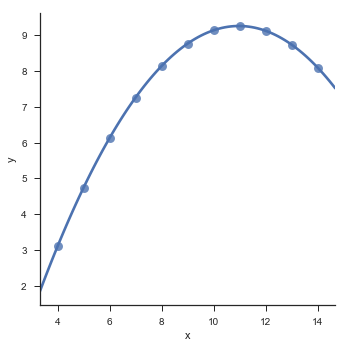

In [6]:
# polynomial regression model to explore nonlinear trends in the dataset II
sns.lmplot(x="x", y="y", data=df.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)


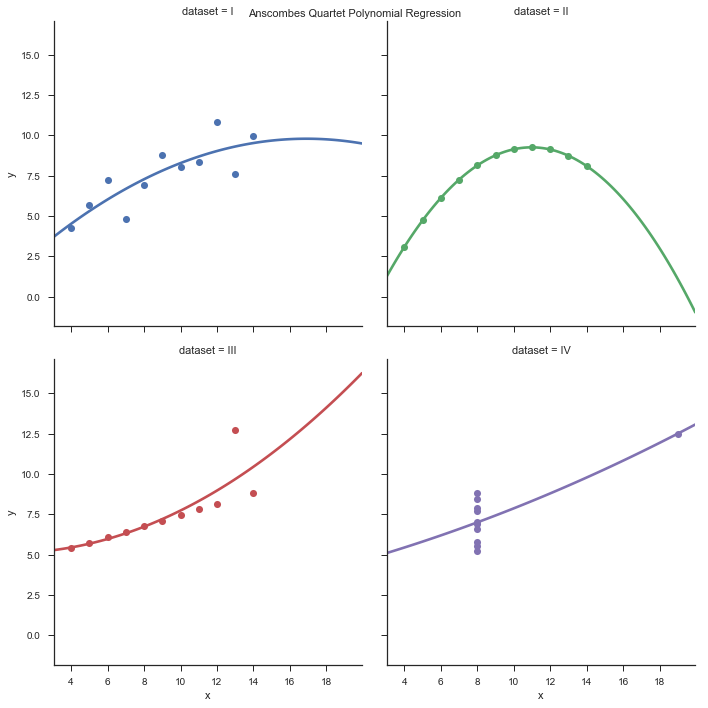

In [46]:
# Show the results of a polynomial regression for all datasets
lm = sns.lmplot(x = "x", y = "y", col = "dataset", data=df, col_wrap=2,
           hue="dataset", order=2, ci=None, 
           scatter_kws={"s":50, "alpha": 1})

fig = lm.fig
fig.suptitle("Anscombes Quartet Polynomial Regression", fontsize =11)
plt.show()

By using a polynomial model, a new line of best fit can be produced. From the graph above it can be clearly seen that this model produces a better representation of the data for datasets II and III. Dataset IV appears to have no obvious change to the linear regression. Dataset I was better represented by the linear regression model.

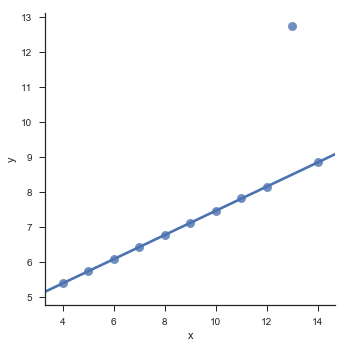

In [49]:
# Robust regression to exclude outlier - Dataset III
sns.lmplot(x="x", y="y", data=df.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

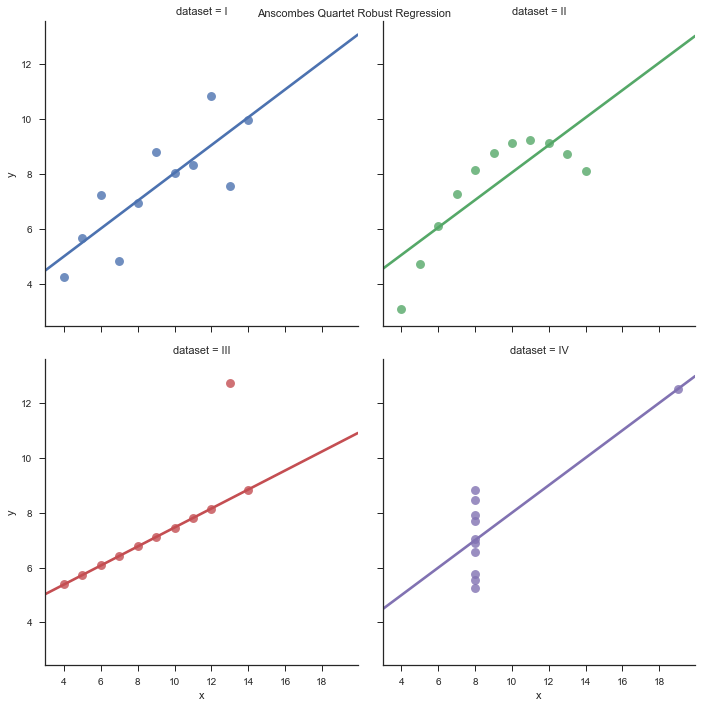

In [48]:
# Robust regression to exclude outlier - All Datasets
lm = sns.lmplot(x = "x", y = "y", col = "dataset", data=df, col_wrap=2,
           hue="dataset", robust=True, ci=None, 
           scatter_kws={"s":80})

fig = lm.fig
fig.suptitle("Anscombes Quartet Robust Regression", fontsize =11)
plt.show()

In the presence of outliers, it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals. [6]

The robust regression analysis has only appeared to have caused a change in the linear regression plot for III.

Residuals are the difference between the observed value and the predicted value. In other words, they are the difference between the data point and the line of best fit. It may be useful to plot the residuals

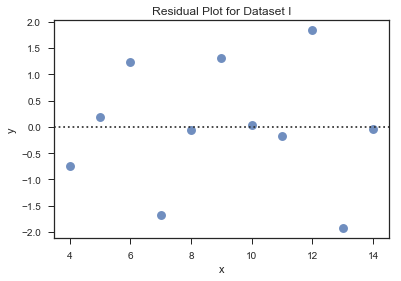

In [50]:
# Residual Plots - Dataset I - Seaborn Documentation
sns.residplot(x="x", y="y", data=df.query("dataset == 'I'"),
scatter_kws={"s": 80});

plt.title("Residual Plot for Dataset I")
plt.show()

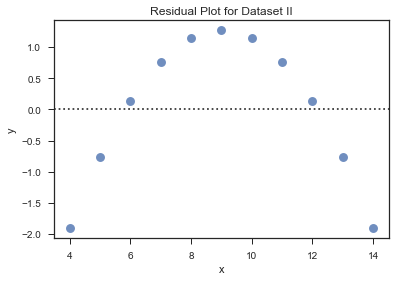

In [39]:
# Residual Plots - Dataset II - Seaborn Documentation
sns.residplot(x="x", y="y", data=df.query("dataset == 'II'"),
scatter_kws={"s": 80});

plt.title("Residual Plot for Dataset II")
plt.show()

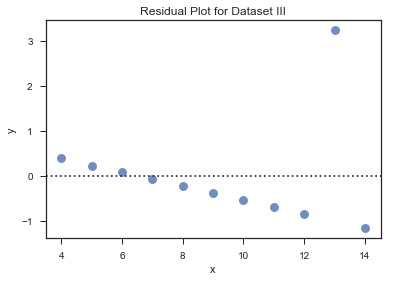

In [40]:
# Residual Plots - Dataset III - Seaborn Documentation
sns.residplot(x="x", y="y", data=df.query("dataset == 'III'"),
scatter_kws={"s": 80});

plt.title("Residual Plot for Dataset III")
plt.show()

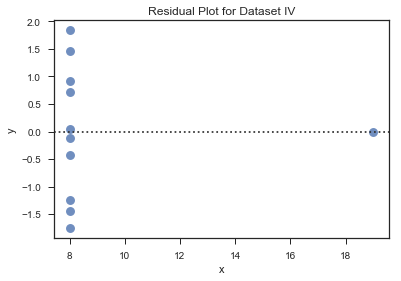

In [41]:
# Residual Plots - Dataset IV - Seaborn Documentation
sns.residplot(x="x", y="y", data=df.query("dataset == 'IV'"),
scatter_kws={"s": 80});

plt.title("Residual Plot for Dataset IV")
plt.show()

If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate. [7]

The residual plots show that the linear regression model is best suited for only dataset I.

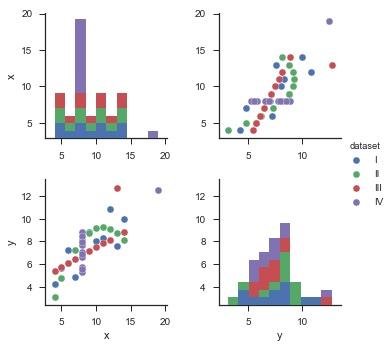

In [51]:
# Create a Pairplot
sns.pairplot(df, hue="dataset")

## Summary And Conclusion

The Anscombe’s dataset provides a vital insight into the importance of visualizing datasets during analysis. Basic descriptive statistics would suggest that the four datasets are extremely similar, if not completely identical. However, when graphed the obvious differences can be clearly noted. 

The similarities within the dataset’s basic statistical properties, produces almost identical linear regression lines.  However, as mentioned above, linear regression is not always suitable. In some cases polynomial regression, robust regression analysis or a combination of several other methods may be more suited. As before mentioned, the removal of outliers can significantly increase the performance of a linear regression. However, it is not always recommended to remove outliers as they can be key indicators of performance for the data being analyzed. This would be especially the case for smaller sample sizes such as these four datasets. 

## References

- **[1]** https://www.r-bloggers.com/using-and-abusing-data-visualization-anscombes-quartet-and-cheating-bonferroni/
- **[2]** https://www.vernier.com/innovate/anscombes-quartet/
- **[3]** https://plotlyblog.tumblr.com/post/68951620673/why-graph-anscombes-quartet
- **[4.1]** Graphs in Statistical Analysis, F. J. Anscombe, The American Statistician, Vol. 27, No. 1. (Feb., 1973), pp. 17-21.
- **[4.2]** http://www.sjsu.edu/faculty/gerstman/StatPrimer/anscombe1973.pdf
- **[5]** https://blog.revolutionanalytics.com/2017/05/the-datasaurus-dozen.html
- **[6]** https://seaborn.pydata.org/tutorial/regression.html
- **[7]** https://stattrek.com/regression/residual-analysis.aspx
